In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import copy
import math

%matplotlib inline

In [27]:
X_train = pd.read_csv('datasets/train_images.csv')                      # Import training data
X_train = np.array(X_train, dtype=np.int64 )
X_train = X_train[:209]                                                    # Only take data to index 209
m, n = X_train.shape                                                    # Assign dimension to m and n
print(len(X_train))                                                          # number of examples and number of pixels RGB 64*64*3



209


In [28]:
X_train = X_train.T                                                    # each sample is a column, rows are pixels
X_train = X_train/255
print(len(X_train))
print(len(X_train[0]))

12288
209


In [29]:
Y_train = pd.read_csv('datasets/train_labels.csv') # Import training labels
Y_train = (np.array(Y_train, dtype=np.int64)).T
Y_train.shape = len(Y_train[0])
Y_train.shape

(209,)

In [30]:
X_dev = pd.read_csv('datasets/test_images.csv', header=None)     # Import test data
X_dev = (np.array(X_dev)).T
X_dev = X_dev/255

print(len(X_dev))
print(len(X_dev[0]))

12288
50


In [31]:
Y_dev = pd.read_csv('datasets/test_labels.csv', header=None)     # Import test label
Y_dev = (np.array(Y_dev, dtype=np.int64)).T
Y_dev.shape = len(Y_dev[0])
Y_dev.shape

(50,)

In [32]:
_,m_train = X_train.shape

In [82]:
def init_params():
    W1 = np.random.rand(10, 12288) - 0.5
    b1 = np.random.rand(10,1)  - 0.5
    W2 = np.random.rand(2, 10) - 0.5
    b2 = np.random.rand(2, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
    

In [83]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [84]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.02, 1000)

Iteration:  0
[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0] [0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
0.5598086124401914
Iteration:  10
[0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1
 0 0 1 0 0 1 0 1 1 0 0 1 0 

In [86]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = (X_train[:, index, None]) 
   
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print(len(prediction))
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = current_image.reshape(64,64,3)
    
    #plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

1
Prediction:  [0]
Label:  0


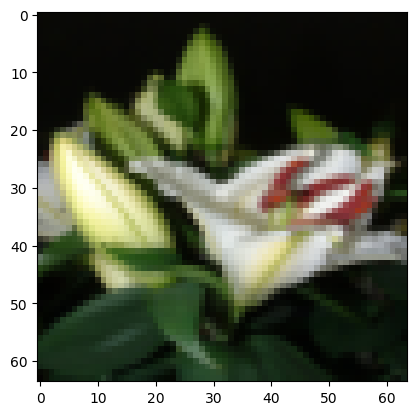

1
Prediction:  [0]
Label:  0


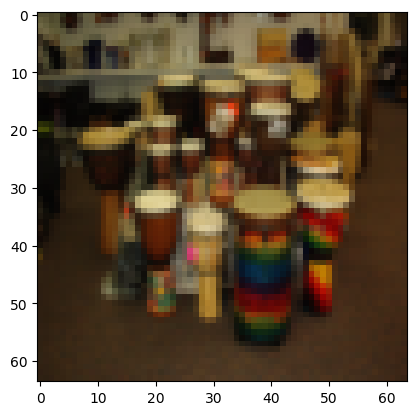

1
Prediction:  [0]
Label:  0


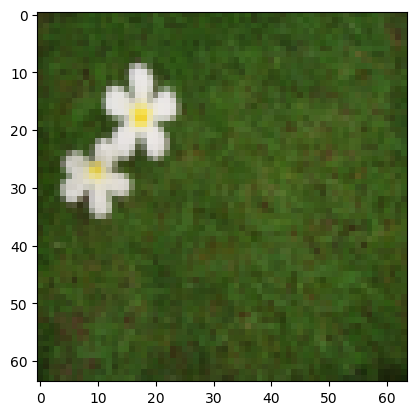

1
Prediction:  [1]
Label:  1


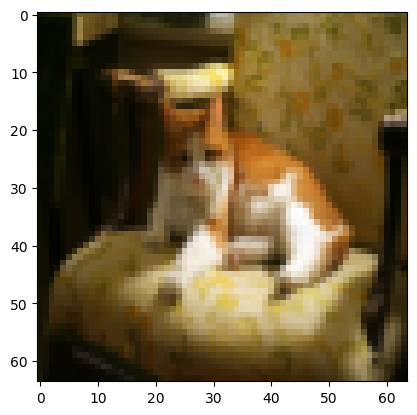

In [87]:
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)

In [88]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0
 0 1 0 1 1 0 0 1 1 0 1 1 1] [1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0
 1 0 0 1 1 1 0 0 0 1 1 1 0]


0.64